In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [366]:
points = np.loadtxt("./polygon.txt")

In [367]:
with open("lower_hulls.txt","r") as f:
    lower_hulls = [x.strip().split(' ') for x in f.readlines()]
    for i,row in enumerate(lower_hulls):
        lower_hulls[i] = [int(x) for x in row]

with open("upper_hulls.txt","r") as f:
    upper_hulls = [x.strip().split(' ') for x in f.readlines()]
    for i,row in enumerate(upper_hulls):
        upper_hulls[i] = [int(x) for x in row]



In [368]:
lower_hulls = lower_hulls[2:]
upper_hulls = upper_hulls[2:]

In [369]:
def plot_hull_chain(chain,col,label):
    x = []
    y = []
    for i,element in enumerate(chain):
        if(i%2==0):
            x.append(element)
        else:
            y.append(element)
    plt.plot(x,y,col,label=label)

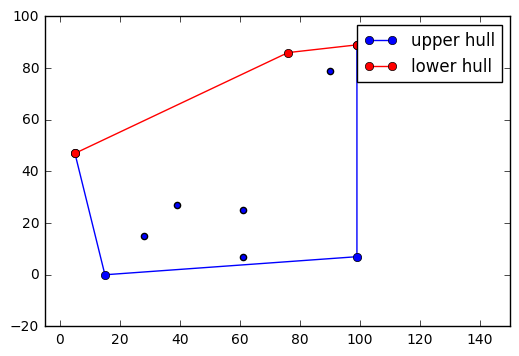

In [370]:
plt.scatter(points[:,0],points[:,1])
plot_hull_chain(lower_hulls[-1],'bo-','upper hull')
plot_hull_chain(upper_hulls[-1],'ro-','lower hull')
plt.xlim(-5,150)
plt.legend()

In [371]:
def show_iteration(i,title=None):
    assert i < len(lower_hulls)
    plt.Figure()
    iter_points = points[:3+i]
    plt.scatter(iter_points[:,0],iter_points[:,1])
    plot_hull_chain(lower_hulls[i],'bo-','lower hull')
    plot_hull_chain(upper_hulls[i],'ro-','upper hull')
    if(i+3 < len(points)):
        plt.scatter([points[i+3][0]],[points[i+3][1]],c='y',label='next point')
    plt.xlim(-5,150)
    plt.ylim(-5,150)
    if title:
        plt.title(title)
    else:
        plt.title("Beginning of Iteration - {}".format(i))
    plt.legend()
    

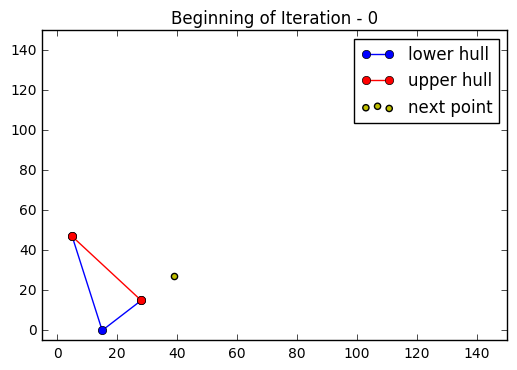

In [372]:
show_iteration(0)

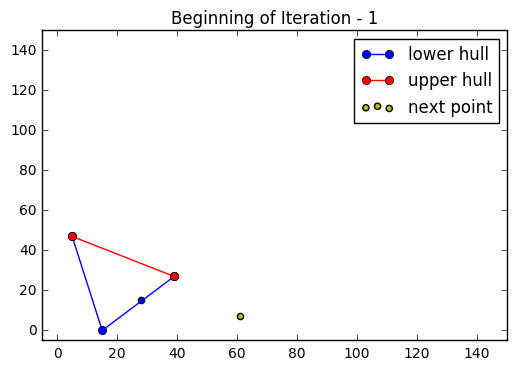

In [373]:
show_iteration(1)

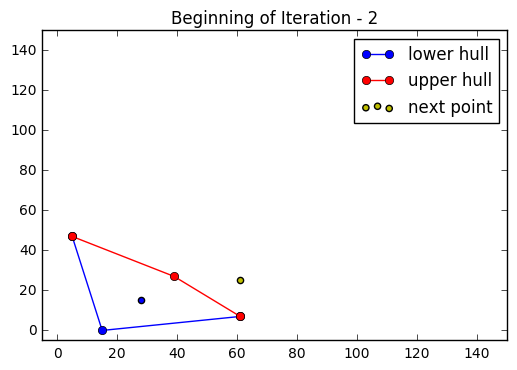

In [374]:
show_iteration(2)

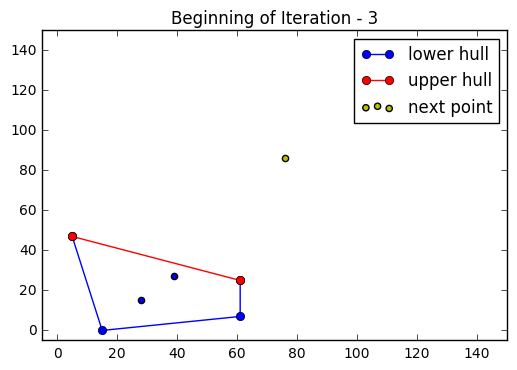

In [375]:
show_iteration(3)

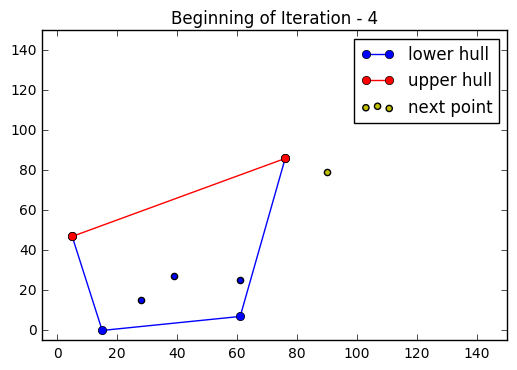

In [376]:
show_iteration(4)


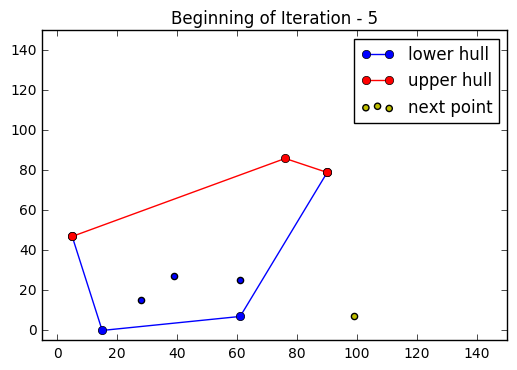

In [377]:
show_iteration(5)

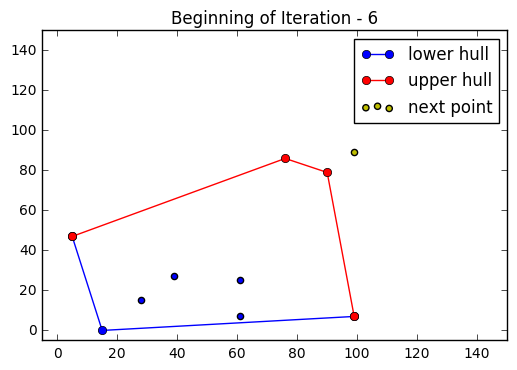

In [378]:
show_iteration(6)

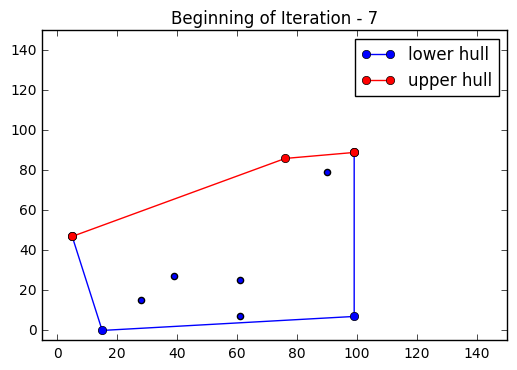

In [379]:
show_iteration(7)
x = np.arange(20,100)


In [380]:
timestamps = np.loadtxt("./time_stamps.txt")

In [381]:
len(timestamps)

100000

In [416]:
new_timestamps = []
window = 100
for i in range(len(timestamps)):
    ll = max(i-window,0)
    ul = min(i+window+1,len(timestamps))
    new_timestamps.append(np.mean(timestamps[ll:ul])/1000)

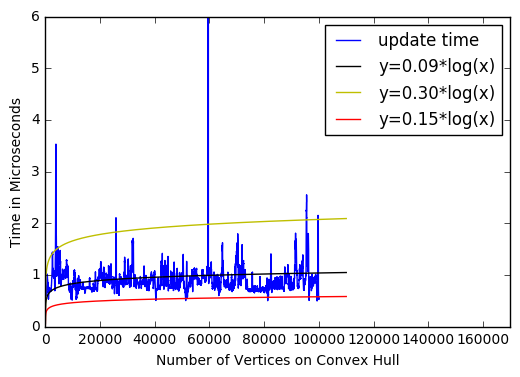

In [417]:
ul = min(100000,len(new_timestamps))
plt.plot(new_timestamps[:ul],label='update time')
plt.ylim(0,6)
plt.xlim(0,ul+70000)
x = np.arange(2,ul+10000)
plt.plot(x,0.09*np.log(x),label='y=0.09*log(x)',c='k')
plt.plot(x,0.18*np.log(x),label='y=0.30*log(x)',c='y')
plt.plot(x,0.05*np.log(x),label='y=0.15*log(x)',c='r')
plt.legend()
plt.xlabel('Number of Vertices on Convex Hull')
plt.ylabel('Time in Microseconds')


In [402]:
values_of_c = np.array(new_timestamps[:ul])/np.log(x[:ul])
np.mean(values_of_c),np.std(values_of_c)

(0.092213088622123685, 0.040466600518681721)

In [214]:
import pickle

In [215]:
with open("dump_10k.pkl","wb") as f:
    pickle.dump(new_timestamps,f)